<a href="https://colab.research.google.com/github/JUNGGUKLEE/jklee/blob/main/Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Fundamentals of Machine Learning**

---


Four branches of machine learning

Evaluating machine - learning models

Data preprocessing, feature enginerring, and feature learning

Overfitting and underfitting

The universal workflow of machine learning

#**Four branches of machine learning**


---


Supervised learning

Unsupervised learning

Self - supervised learning

Reinforcement learning

#Supervised learning
    Learning to map input data to known targets
    ex) classification, regression, object detection, image segmentation, etc

# Unsupervised learning
    Finding interesting transformations of the input data without the help of any targets
    ex) Dimension reduction, clustering, etc.

#Self-supervised learning
    Supervised learning without human annotated labels
    ex) autoencoder

#Reinforcement learning
    how agents ought to take actions in an environment in order to maximize the cumulative reward

#Evaluating machine-learning models
    Goal is to achieve models that generalize
    Evaluate with training, validation, and test sets 
    -> validation을 중간에 두는 경향이 많음.
 

---


 Tuning parameters and hyperparameters is a form of learning

 Tuning is based on its performance on validation set

 Tuning a lot would cause information leak
 
 Thus, you need never-before-seen test dataset

In [ ]:
#validation 기법

In [ ]:
#Simple hold-out validation
#전체 데이터 set이 있으면 일정부분은 Training set, 일정부분은 Hold-out validation set(evaluate set)

In [ ]:
#num_validation_samples = 10000
#np.random.shuffle(data)
#validation_data = data[:num_validation_samples]
#data = data[num_validation_samples:]
#training_data = data[:]

#model=get_model()
#model.train(training_data)
#validation_score = model.evaluate(validation_data)

#model=get_model()
#model.train(np.concatenate([traing_data,validation_data]))
#test_score = model.evaluate(test_data)

In [ ]:
#K-Fold validation
#data가 적거나 효율적으로 사용해야 할때 사용한다.

In [ ]:
#k = 4
#num_validation_samples = len(data)//k

#np.random.shuffle(data)

#validation_scores=[]
#for fold in range(k):
 # validation_data = data[num_validation_samples*fold:
  #                       num_validation_samples*(fold+1)]
  #training_data = data[:num_validation_samples*fold]+data[num_validation_samples*(fold+1):]

  #model = get_model()
  #model.train(training_data)
  #validation_score = model.evaluate(validation_data)
  #validation_scores.append(validation_score)

#validation_score = np.average(validation_scores)

#model = get_model()
#model.train(data)
#test_score = model.evaluate(test_data)

#**Things to keep in mind**

Data representativeness

: Randomly shuffle data before splitting it

the arrow of time

:If you are predicting future event, don't shuffle.
Use future data as test set
(미래에 있는 데이터 set을 테스트 셋으로 활용)

Redundancy in your data

:(데이터를 잘 정리해라, 중복데이터를 정리한다던가 등등)

#**Data preprocessing, feature engineering, and feature learning**

데이터를 그냥 넣으면돼?

how to prepare the input data and targets before feeding them into a neural network?



---

***Data preprocessing for neural networks***

***Feature engineering***





#**Data preprocessing for neural networks**

Vectorization
        
    : All inputs must be tensors.

Value normalization
   
    : Take small values : most values in 0 - 1
    : Be homogenous = all features should take values in roughly the same range

Handling missing data

    : train_data 에만 missing이 존재하고 test 에는 없는 경우도 있다. 그럴 경우에는 test에도 train 과 비슷한 상황을 만들어 주어야 한다.  


#**Feature engineering**

Process of using domain knowledge to extract features from raw data


Used to improve the performance of machine learning algorithms

Essence of feature engineering : making a problem easier by expressing it in a simpler way

Before deep learning, feature engineering used to be critical 

( 왜 중요했냐? 딥러닝 나오기 전에는 사람이 손으로 했다)

Modern deep-learning automatically do feature engineering but still we need good features

#**Overfitting and underfitting**



---


ex) O 와 X를 구분하는 문제

Under fitting : Too simple to explain the variance

Over fitting : Too good to be ture ( 트레이닝 셋트에서는 매우 좋은 결과를 나타내지만 테스트 셋에서는 에러율이 올라가는 현상 나타남, 너무모형이 복잡해지는것)



#Getting more data as you can
#Reducing the network's size


The simplest way to prevent overfitting is to reduce the size of the model

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data,train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [ ]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 5s 96ms/step - loss: 0.4490 - acc: 0.8194 - val_loss: 0.3312 - val_acc: 0.8821
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2569 - acc: 0.9104 - val_loss: 0.2842 - val_acc: 0.8886
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1976 - acc: 0.9299 - val_loss: 0.2965 - val_acc: 0.8808
Epoch 4/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1643 - acc: 0.9422 - val_loss: 0.3499 - val_acc: 0.8637
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.1407 - acc: 0.9499 - val_loss: 0.3169 - val_acc: 0.8780
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1218 - acc: 0.9582 - val_loss: 0.3389 - val_acc: 0.8755
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1035 - acc: 0.9659 - val_loss: 0.3572 - val_acc: 0.8728
Epoch 8/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0917 - a

In [ ]:
smaller_model_hist = smaller_model.fit(x_train, y_train, epochs = 20, batch_size= 512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 54ms/step - loss: 0.5068 - acc: 0.8156 - val_loss: 0.4111 - val_acc: 0.8671
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3342 - acc: 0.8934 - val_loss: 0.3304 - val_acc: 0.8826
Epoch 3/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2601 - acc: 0.9124 - val_loss: 0.2952 - val_acc: 0.8877
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2190 - acc: 0.9262 - val_loss: 0.2826 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1918 - acc: 0.9341 - val_loss: 0.2789 - val_acc: 0.8882
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1706 - acc: 0.9409 - val_loss: 0.2844 - val_acc: 0.8866
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1549 - acc: 0.9462 - val_loss: 0.2937 - val_acc: 0.8835
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1416 - a

In [ ]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss=smaller_model_hist.history['val_loss']

In [ ]:
original_dict=original_hist.history

original_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

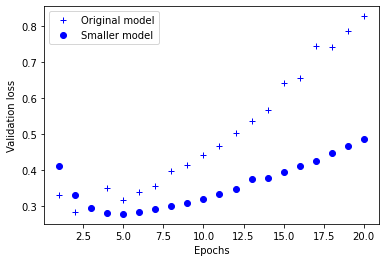

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label = 'Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label = 'Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train, epochs = 20, batch_size= 512, validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 18s 378ms/step - loss: 5.9823e-09 - acc: 1.0000 - val_loss: 1.6192 - val_acc: 0.8756
Epoch 2/20
49/49 [==============================] - 17s 353ms/step - loss: 5.1580e-09 - acc: 1.0000 - val_loss: 1.6282 - val_acc: 0.8760
Epoch 3/20
49/49 [==============================] - 17s 354ms/step - loss: 4.5252e-09 - acc: 1.0000 - val_loss: 1.6402 - val_acc: 0.8756
Epoch 4/20
49/49 [==============================] - 17s 356ms/step - loss: 4.0567e-09 - acc: 1.0000 - val_loss: 1.6485 - val_acc: 0.8755
Epoch 5/20
49/49 [==============================] - 17s 355ms/step - loss: 3.6739e-09 - acc: 1.0000 - val_loss: 1.6567 - val_acc: 0.8755
Epoch 6/20
49/49 [==============================] - 17s 353ms/step - loss: 3.3581e-09 - acc: 1.0000 - val_loss: 1.6650 - val_acc: 0.8756
Epoch 7/20
49/49 [==============================] - 17s 352ms/step - loss: 3.1117e-09 - acc: 1.0000 - val_loss: 1.6715 - val_acc: 0.8756
Epoch 8/20
49/49 [=======================

In [ ]:
bigger_model_val_loss=bigger_model_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label = 'Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label = 'Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

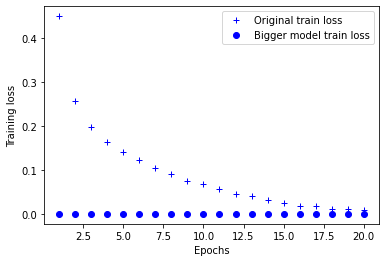

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label = 'Original train loss')
plt.plot(epochs, bigger_model_train_loss, 'bo', label = 'Bigger model train loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

#**Adding weight regularization**

---

Simpler models are less likely to overfit than complex ones

Simple model is a model where the parameter values has less entropy


**L1 regularization**

**L2 regularization**

참고
[URL](https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0)



In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                      activation = 'relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                      activation = 'relu'))
l2_model.add(layers.Dense(1, activation = 'sigmoid'))

#0.001 이 값은 람다의 값. 이 값이 크면 클 수록 regularizer의 값을 크게 하겠다는 것.

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss = 'binary_crossentropy',
                 metrics=['acc'])


In [ ]:
l2_model_hist=l2_model.fit(x_train, y_train, epochs=20, batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 4s 68ms/step - loss: 0.4895 - acc: 0.8185 - val_loss: 0.3803 - val_acc: 0.8817
Epoch 2/20
49/49 [==============================] - 2s 48ms/step - loss: 0.3163 - acc: 0.9056 - val_loss: 0.3411 - val_acc: 0.8836
Epoch 3/20
49/49 [==============================] - 3s 53ms/step - loss: 0.2703 - acc: 0.9220 - val_loss: 0.3402 - val_acc: 0.8828
Epoch 4/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2505 - acc: 0.9285 - val_loss: 0.3371 - val_acc: 0.8859
Epoch 5/20
49/49 [==============================] - 3s 53ms/step - loss: 0.2393 - acc: 0.9322 - val_loss: 0.3624 - val_acc: 0.8759
Epoch 6/20
49/49 [==============================] - 3s 53ms/step - loss: 0.2312 - acc: 0.9354 - val_loss: 0.3648 - val_acc: 0.8774
Epoch 7/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2254 - acc: 0.9395 - val_loss: 0.3597 - val_acc: 0.8789
Epoch 8/20
49/49 [==============================] - 3s 70ms/step - loss: 0.2168 - a

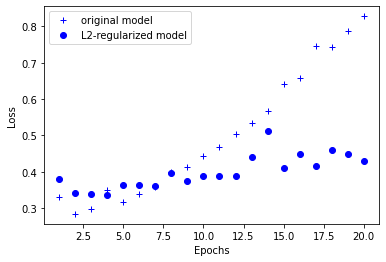

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label = 'original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label = 'L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


L2 Regularization이 overfitting을 하지는 않지만, 결국 초반에는 original 모델이 loss가 더 낮음을 확인할 수 있다. 따라서 early stopping 방법등을 활용하여 original 모델을 선택하는것이 전략일 수 있음.

#**Adding dropout**


---


Randomly dropping out(setting to zero) a number of output features of the layer during training.

각 레이어에서 50%씩 드랍아웃 했다고 치면, 일정 비율의 노드들을 쓰지 않는다는것?
트레이닝을 할 때 마다 매번 다른 노드들을 활용 - > 랜덤 포레스트? 형식임

장점 -> 그냥 스탠다드 뉴럴네트워크는 특정 노드드렝 편중되기 때문에 웨이트가 커지는 단점이 보인다고함, 드랍아웃 방법을 사용하면 특정 노드들이 드랍아웃 되면서 노드 편중 현상을 줄일 수 있음


In [ ]:

dpt_model = models.Sequential()

dpt_model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1,activation='sigmoid'))

dpt_model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])

In [ ]:
dpt_model_hist=dpt_model.fit(x_train,y_train, 
                             epochs = 20, 
                             batch_size = 512,
                             validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 66ms/step - loss: 0.6044 - acc: 0.6663 - val_loss: 0.4532 - val_acc: 0.8601
Epoch 2/20
49/49 [==============================] - 2s 49ms/step - loss: 0.4547 - acc: 0.8046 - val_loss: 0.3400 - val_acc: 0.8792
Epoch 3/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3638 - acc: 0.8558 - val_loss: 0.2928 - val_acc: 0.8834
Epoch 4/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2964 - acc: 0.8889 - val_loss: 0.2781 - val_acc: 0.8868
Epoch 5/20
49/49 [==============================] - 2s 48ms/step - loss: 0.2615 - acc: 0.9080 - val_loss: 0.2787 - val_acc: 0.8884
Epoch 6/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2299 - acc: 0.9225 - val_loss: 0.2943 - val_acc: 0.8862
Epoch 7/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2057 - acc: 0.9295 - val_loss: 0.3064 - val_acc: 0.8839
Epoch 8/20
49/49 [==============================] - 3s 52ms/step - loss: 0.1891 - a

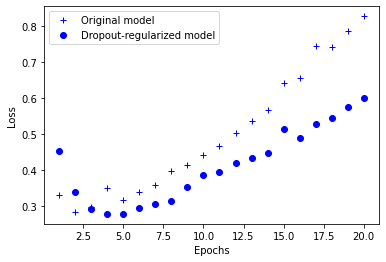

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label = 'Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#**The universal workflow of machine learning**


---
---


Defining the problem and assembling a dataset

Choosing a measure of success

Deciding on an evaluation protocol

preparing your data

Developing a model that does better than a baseline

Developing a model that does better than a baseline.

Scaling up : developing a model that overfits

Regularizing your model and tuning your hyperparameters.


In [ ]:
#visit  https://colab.research.google.com/github/
#find fchollet's github